# **Klasifikasi Naive Bayes (Ecoli)**

Naive Bayes **bold text** adalah algoritma machine learning berbasis probabilitas yang menggunakan Teorema Bayes.
Disebut naive (sederhana/naif) karena algoritma ini mengasumsikan bahwa setiap fitur (variabel) bersifat independen satu sama lain dalam mempengaruhi kelas/label.


Kita akan melakukan klasifikasi data ecoli menggunakan metode naive bayes gaussian:

* data ecoli sebelum oversampling
* data ecoli sesudah oversampling (SMOTE)
* data ecoli sesudah oversampling (ADASYN)

Mencari akurasi dari setiap jenis kondisi data dan mencari akurasi tertinggi atau terbaik


## **Instalasi Library**

Install library yang akan digunakan dalam mendukung proses pemodelan

In [ ]:
!pip install pandas scikit-learn matplotlib openpyxl pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 890.3 kB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB


## Pengambilan Data

Data ecoli diambil dari:
https://archive.ics.uci.edu/dataset/39/ecoli

dan dilakukan dengan cara:

1. data asli yang sudah berada pada csv
2. data oversampling smote yang sudah dalam bentuk xlsx
2. data oversampling adasyn yang sudah dalam bentuk xlsx

### Pengambilan data Ecoli asli

In [ ]:
from google.colab import files
import pandas as pd

# Upload file data_ecoli.xlsx
uploaded = files.upload()

# Baca file
df = pd.read_excel("data_ecoli.xlsx")
X = df.drop(columns=["class"])   # fitur
y = df["class"]

df


Saving data_ecoli.xlsx to data_ecoli (6).xlsx


,id,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,1,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,2,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,3,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,4,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,5,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,332,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,333,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,334,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,335,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


### Pengambilan data Ecoli Oversampling (SMOTE)

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df_smote = pd.read_excel("hasil_smote.xlsx")
x_smote = df_smote.drop(columns=["class"])
y_smote = df_smote["class"]
df_smote


Saving hasil_smote.xlsx to hasil_smote.xlsx


,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,cp
1,0.070000,0.400000,0.48,0.5,0.540000,0.350000,0.440000,cp
2,0.560000,0.400000,0.48,0.5,0.490000,0.370000,0.460000,cp
3,0.590000,0.490000,0.48,0.5,0.520000,0.450000,0.360000,cp
4,0.230000,0.320000,0.48,0.5,0.550000,0.250000,0.350000,cp
...,...,...,...,...,...,...,...,...
1139,0.660161,0.679839,0.48,0.5,0.615080,0.440214,0.400054,pp
1140,0.755882,0.732574,0.48,0.5,0.439485,0.392574,0.391544,pp
1141,0.632786,0.854427,0.48,0.5,0.384427,0.464427,0.356719,pp
1142,0.734496,0.747339,0.48,0.5,0.316421,0.541008,0.523669,pp


### Pengambilan data Ecoli Oversampling (ADASYN)

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df_adasyn = pd.read_excel("hasil_adasyn.xlsx")
x_adasyn = df_adasyn.drop(columns=["class"])
y_adasyn = df_adasyn["class"]
df_adasyn


Saving hasil_adasyn.xlsx to hasil_adasyn.xlsx


,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,cp
1,0.070000,0.400000,0.48,0.5,0.540000,0.350000,0.440000,cp
2,0.560000,0.400000,0.48,0.5,0.490000,0.370000,0.460000,cp
3,0.590000,0.490000,0.48,0.5,0.520000,0.450000,0.360000,cp
4,0.230000,0.320000,0.48,0.5,0.550000,0.250000,0.350000,cp
...,...,...,...,...,...,...,...,...
1146,0.406464,0.508027,0.48,0.5,0.488118,0.670000,0.396282,im
1147,0.359502,0.539751,0.48,0.5,0.397687,0.665783,0.299092,im
1148,0.628443,0.534551,0.48,0.5,0.599400,0.790778,0.771856,im
1149,0.584697,0.617865,0.48,0.5,0.613573,0.688472,0.663775,im


## **Klasifikasi tanpa Oversampling**

Klasifikasi pada data ecoli sebelum melalui proses oversampling

Akurasi Skor  : 0.8970588235294118

Classification Report (Test Data):
               precision    recall  f1-score   support

          cp       0.94      1.00      0.97        32
          im       0.71      0.77      0.74        13
         imS       0.00      0.00      0.00         1
         imU       0.67      0.50      0.57         4
          om       1.00      1.00      1.00         6
         omL       1.00      1.00      1.00         1
          pp       1.00      0.91      0.95        11

    accuracy                           0.90        68
   macro avg       0.76      0.74      0.75        68
weighted avg       0.88      0.90      0.89        68



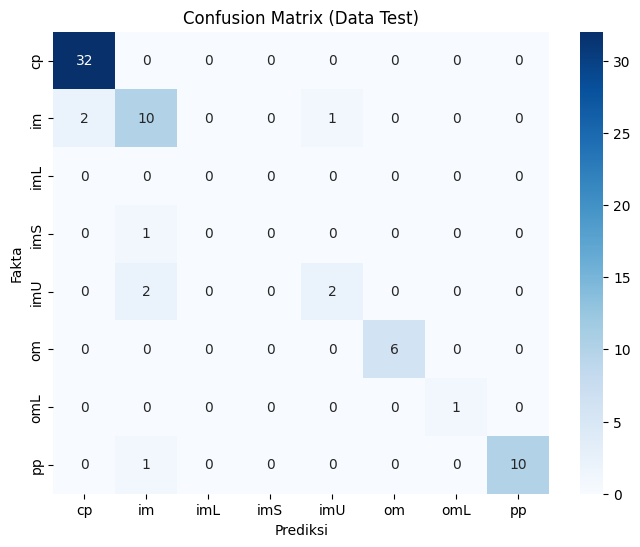

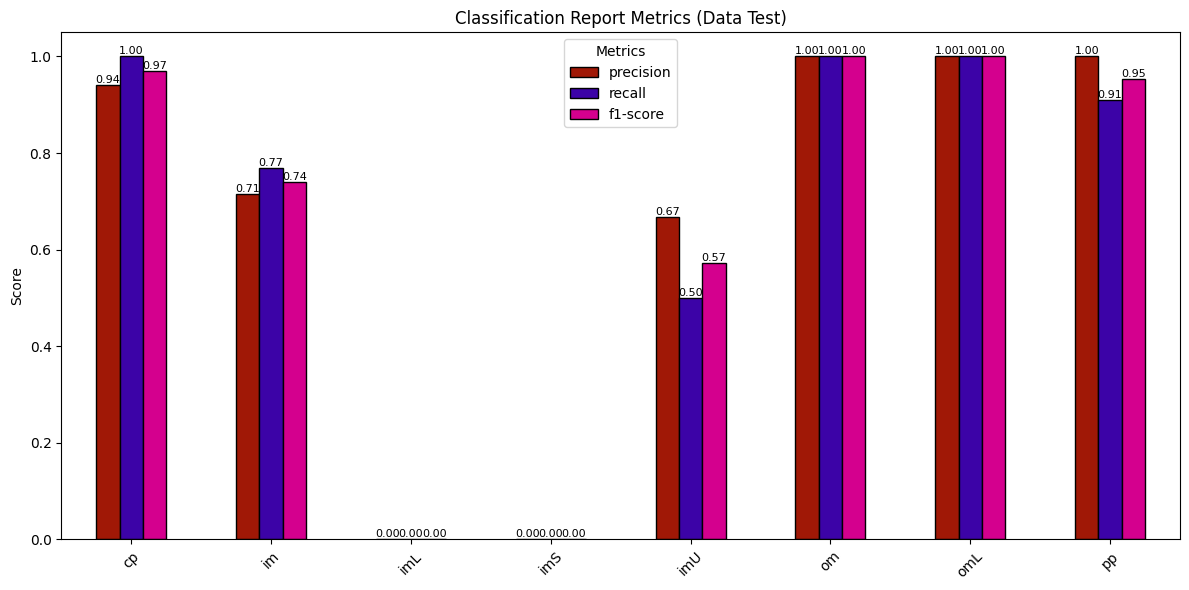

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

nb = GaussianNB()
nb.fit(X_train, y_train)

prediksi_train = nb.predict(X_train)
prediksi_test = nb.predict(X_test)


print("Akurasi Skor  :", accuracy_score(y_test, prediksi_test))

# --- Classification Report (pakai data test) ---
print("\nClassification Report (Test Data):\n",
      classification_report(y_test, prediksi_test, zero_division=0))

# --- Confusion Matrix (pakai data test) ---
labels = np.unique(np.concatenate([y_train, y_test]))

cm = confusion_matrix(y_test, prediksi_test, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Data Test)")
plt.show()

# --- Report ke DataFrame ---
all_labels = np.unique(np.concatenate([y_train, y_test]))

report = classification_report(
    y_test, prediksi_test, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()

metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# --- Diagram batang metrics ---
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Data Test)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# Tampilkan nilai di atas batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


## **Klasifikasi Data Oversampling (SMOTE)**

Klasifikasi pada data ecoli sesudah melalui proses oversampling menggunakan SMOTE

Akurasi Skor (Data Test SMOTE): 0.8253275109170306

Classification Report (Test Data - SMOTE):
               precision    recall  f1-score   support

          cp       0.97      0.97      0.97        32
          im       1.00      0.54      0.70        28
         imL       1.00      1.00      1.00        29
         imS       1.00      1.00      1.00        31
         imU       0.67      0.81      0.73        27
          om       1.00      0.28      0.43        29
         omL       0.95      1.00      0.97        19
          pp       0.56      1.00      0.72        34

    accuracy                           0.83       229
   macro avg       0.89      0.82      0.82       229
weighted avg       0.89      0.83      0.81       229



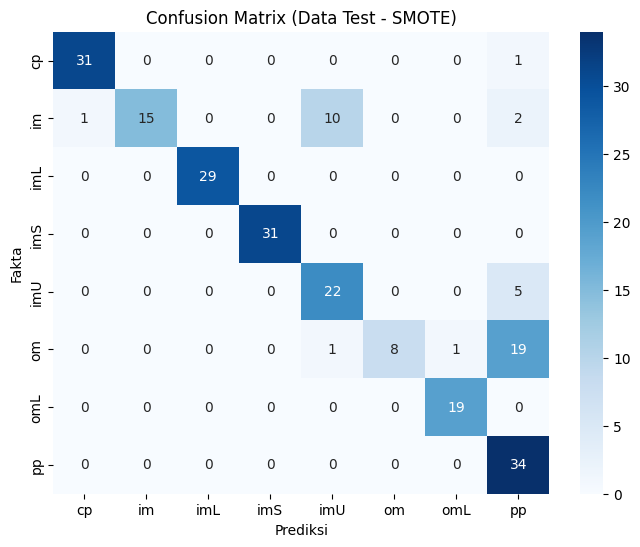

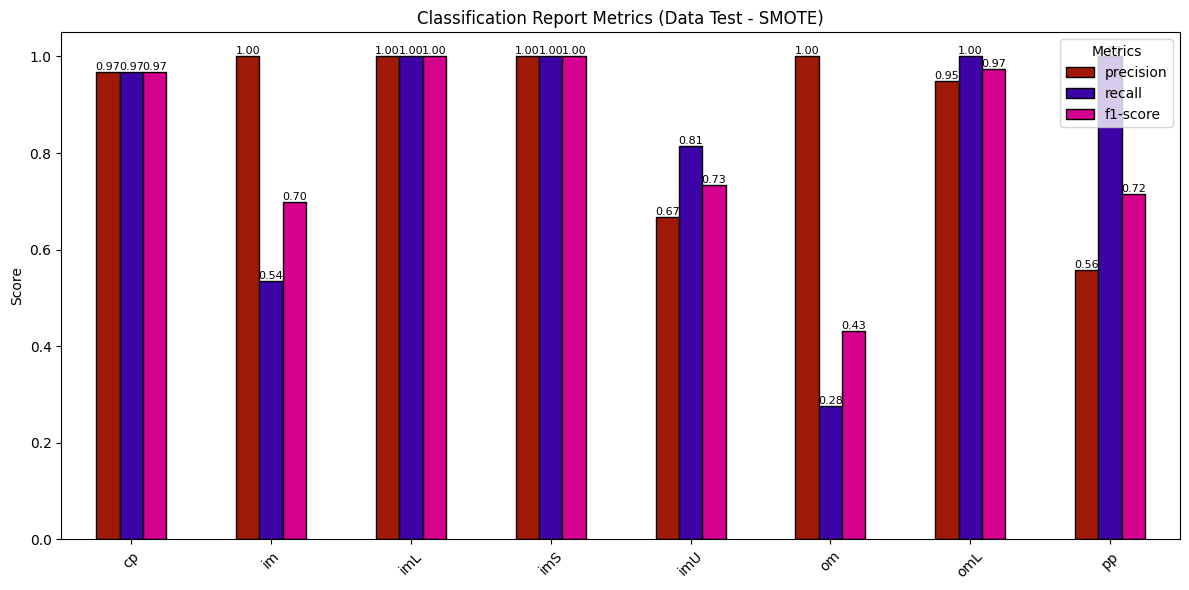

In [ ]:


# Split data SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    x_smote, y_smote, test_size=0.2, random_state=42
)

# Model Naive Bayes (GaussianNB)
nb = GaussianNB()
nb.fit(X_train_smote, y_train_smote)

# Prediksi
prediksi_train_smote = nb.predict(X_train_smote)
prediksi_test_smote = nb.predict(X_test_smote)

# --- Evaluasi ---
print("Akurasi Skor (Data Test SMOTE):", accuracy_score(y_test_smote, prediksi_test_smote))

# Classification Report
print("\nClassification Report (Test Data - SMOTE):\n",
      classification_report(y_test_smote, prediksi_test_smote, zero_division=0))

# Confusion Matrix
labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))
cm = confusion_matrix(y_test_smote, prediksi_test_smote, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Data Test - SMOTE)")
plt.show()

# Report ke DataFrame
all_labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))
report = classification_report(
    y_test_smote, prediksi_test_smote, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()
metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# Diagram batang metrics
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Data Test - SMOTE)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# Tampilkan nilai di atas batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


## **Klasifikasi Data Oversampling (ADASYN)**

Klasifikasi pada data ecoli sesudah melalui proses oversampling menggunakan ADASYN

Akurasi Skor (Data Test ADASYN): 0.8354978354978355

Classification Report (Test Data - ADASYN):
               precision    recall  f1-score   support

          cp       0.88      0.97      0.92        31
          im       0.90      0.64      0.75        28
         imL       1.00      1.00      1.00        27
         imS       0.94      1.00      0.97        29
         imU       0.85      0.71      0.77        31
          om       1.00      0.50      0.67        36
         omL       1.00      1.00      1.00        21
          pp       0.52      1.00      0.68        28

    accuracy                           0.84       231
   macro avg       0.89      0.85      0.85       231
weighted avg       0.88      0.84      0.83       231



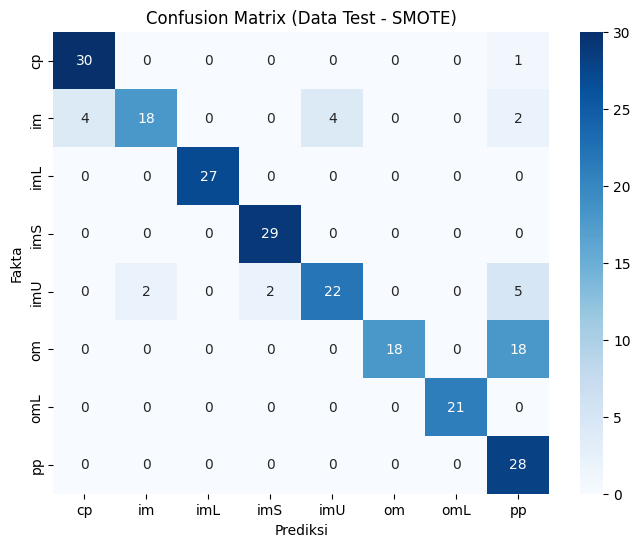

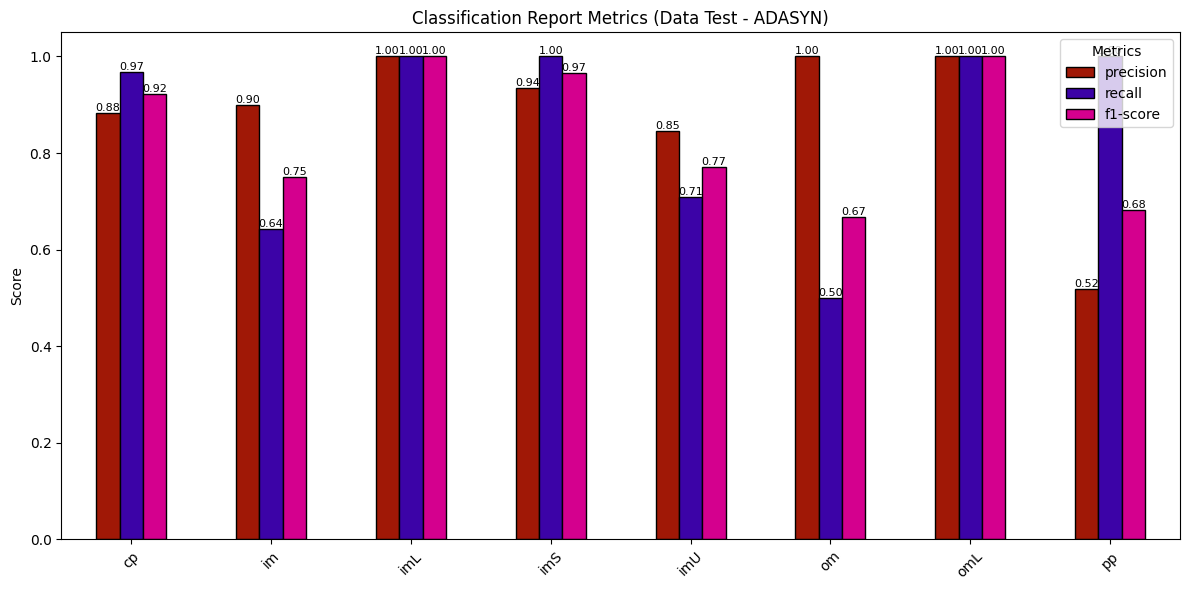

In [ ]:


# Split data SMOTE
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    x_adasyn, y_adasyn, test_size=0.2, random_state=42
)

# Model Naive Bayes (GaussianNB)
nb = GaussianNB()
nb.fit(X_train_adasyn, y_train_adasyn)

# Prediksi
prediksi_train_adasyn = nb.predict(X_train_adasyn)
prediksi_test_adasyn = nb.predict(X_test_adasyn)

# --- Evaluasi ---
print("Akurasi Skor (Data Test ADASYN):", accuracy_score(y_test_adasyn, prediksi_test_adasyn))

# Classification Report
print("\nClassification Report (Test Data - ADASYN):\n",
      classification_report(y_test_adasyn, prediksi_test_adasyn, zero_division=0))

# Confusion Matrix
labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))
cm = confusion_matrix(y_test_adasyn, prediksi_test_adasyn, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Data Test - SMOTE)")
plt.show()

# Report ke DataFrame
all_labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))
report = classification_report(
    y_test_adasyn, prediksi_test_adasyn, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()
metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# Diagram batang metrics
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Data Test - ADASYN)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# Tampilkan nilai di atas batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


## **Perbandingan Akurasi**

Membandingkan akurasi data ecoli:

1. Data Asli
2. Data Oversampling SMOTE
2. Data Oversampling ADASYN



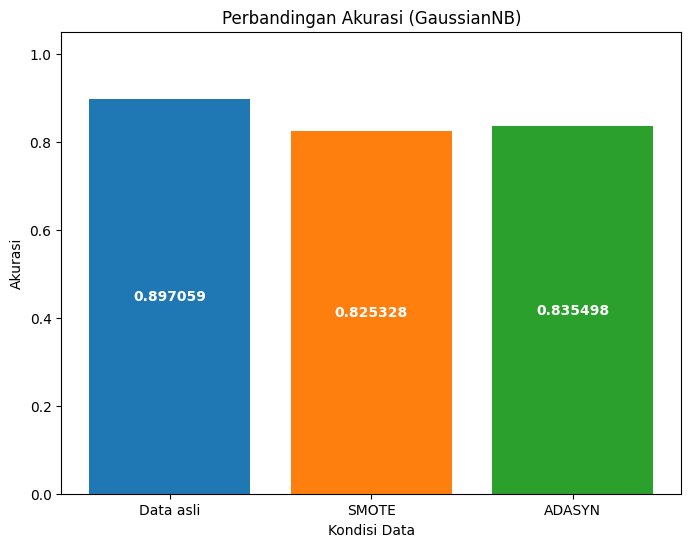

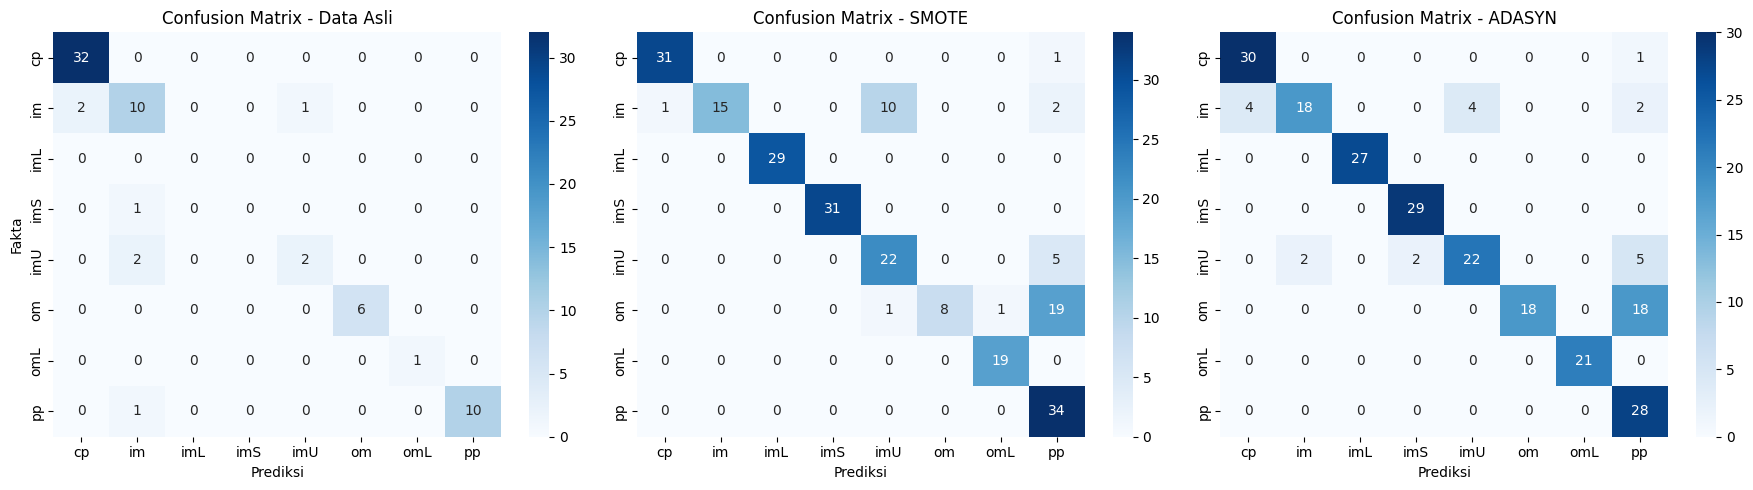

In [ ]:
akurasi = accuracy_score(y_test, prediksi_test)
akurasi_smote = accuracy_score(y_test_smote, prediksi_test_smote)
akurasi_adasyn = accuracy_score(y_test_adasyn, prediksi_test_adasyn)

# =====================================================
# 5. Visualisasi akurasi dalam bar chart
# =====================================================
label = ['Data asli', 'SMOTE', 'ADASYN']
temp = [akurasi, akurasi_smote, akurasi_adasyn]

fig, ax = plt.subplots(figsize=(8,6))
bc = ax.bar(label, temp, color=['#1f77b4','#ff7f0e','#2ca02c'])
ax.bar_label(bc, label_type='center', color='w', fontweight='bold')

ax.set(
    xlabel='Kondisi Data',
    ylabel='Akurasi',
    title='Perbandingan Akurasi (GaussianNB)'
)
ax.set_ylim(0, 1.05)
plt.show()

# =====================================================
# 6. Confusion Matrix per kondisi
# =====================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- Data asli
labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, prediksi_test, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Confusion Matrix - Data Asli")
axes[0].set_xlabel("Prediksi")
axes[0].set_ylabel("Fakta")

# --- Data SMOTE
labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))
cm = confusion_matrix(y_test_smote, prediksi_test_smote, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Confusion Matrix - SMOTE")
axes[1].set_xlabel("Prediksi")
axes[1].set_ylabel("")

# --- Data ADASYN
labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))
cm = confusion_matrix(y_test_adasyn, prediksi_test_adasyn, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title("Confusion Matrix - ADASYN")
axes[2].set_xlabel("Prediksi")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


## **Kesimpulan**

1. **Performa Model pada Data Asli**

    * Akurasi tertinggi diperoleh pada data asli (89,7%).

    * Confusion matrix menunjukkan bahwa sebagian besar kelas dapat diprediksi dengan benar, walaupun masih ada beberapa kesalahan pada kelas minoritas (misalnya im, ims, con).

    * Artinya, GaussianNB bekerja cukup baik tanpa teknik oversampling, meskipun ada risiko bias terhadap kelas mayoritas.

2. **Performa Model pada Data SMOTE**

    * Akurasi turun menjadi 82,5% setelah dilakukan SMOTE.

    * Confusion matrix memperlihatkan bahwa prediksi lebih menyebar ke berbagai kelas. Misalnya, kelas minoritas seperti iml, ims, imu mulai terdeteksi lebih baik dibanding data asli.

    * Hal ini menunjukkan bahwa SMOTE membantu mengurangi bias terhadap kelas mayoritas, meskipun secara keseluruhan menurunkan akurasi karena distribusi data yang lebih seimbang membuat model harus “bekerja lebih keras”.

3. **Performa Model pada Data ADASYN**

    * Akurasi sedikit lebih baik dari SMOTE, yaitu 83,5%, namun tetap lebih rendah dibanding data asli.

    * Confusion matrix memperlihatkan hasil yang mirip dengan SMOTE: beberapa kelas minoritas seperti im, imu, con terprediksi lebih baik dibanding data asli.

    * Ini menandakan bahwa ADASYN juga efektif dalam mengenalkan variasi data pada kelas minoritas, meski trade-off-nya tetap berupa penurunan akurasi total.